# Fundamentals of Machine Learning - Exercise 9
Goal of this excercise is to complete the hands-on experience of the classification task.

## Household Prices Dataset
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

* ... I bet that you already know the data pretty well 😅

![meme03](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_09_meme_03.jpg?raw=true)

**Important attributes description:**
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level)



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, auc
from sklearn.preprocessing import OrdinalEncoder

# 🎯 Our goal is to predict if the house will be sold for more than 250k USD or not
* We will use categorized price as a **Target** variable

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv', sep=',')
df = df.loc[:, ['SalePrice','MSSubClass','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','Heating','CentralAir','GrLivArea','BedroomAbvGr']]
df.loc[:, ['Target']] = (df.SalePrice > 250000).astype(int)
df = df.drop(['SalePrice'], axis=1)

In [4]:
df.head()

,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr,Target
0,60,1Fam,2Story,7,5,2003,GasA,Y,1710,3,0
1,20,1Fam,1Story,6,8,1976,GasA,Y,1262,3,0
2,60,1Fam,2Story,7,5,2001,GasA,Y,1786,3,0
3,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3,0
4,60,1Fam,2Story,8,5,2000,GasA,Y,2198,4,0


# Take a look at the features
* We will need it to answer the questions

In [4]:
df.describe()

,MSSubClass,OverallQual,OverallCond,YearBuilt,GrLivArea,BedroomAbvGr,Target
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,6.099315,5.575342,1971.267808,1515.463699,2.866438,0.148630
std,42.300571,1.382997,1.112799,30.202904,525.480383,0.815778,0.355845
min,20.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000
25%,20.000000,5.000000,5.000000,1954.000000,1129.500000,2.000000,0.000000
50%,50.000000,6.000000,5.000000,1973.000000,1464.000000,3.000000,0.000000
75%,70.000000,7.000000,6.000000,2000.000000,1776.750000,3.000000,0.000000
max,190.000000,10.000000,9.000000,2010.000000,5642.000000,8.000000,1.000000


## Categorial features EDA

In [5]:
df.describe(exclude=np.number)

,BldgType,HouseStyle,Heating,CentralAir
count,1460,1460,1460,1460
unique,5,8,6,2
top,1Fam,1Story,GasA,Y
freq,1220,726,1428,1365


### BldgType

In [6]:
df.BldgType.value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

### HouseStyle

In [7]:
df.HouseStyle.value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

### Heating

In [8]:
df.Heating.value_counts()

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

## Missing values

In [9]:
df.isna().sum()

MSSubClass      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
Heating         0
CentralAir      0
GrLivArea       0
BedroomAbvGr    0
Target          0
dtype: int64

## Labels distribution

In [10]:
df.Target.value_counts()

Target
0    1243
1     217
Name: count, dtype: int64

# ✅ Task (2p)
Complete the following tasks:

1. 📈 Describe what operations you are performing for each of the features
    * Mainly focus on categorical features
      
2. 📌 Answer the following questions:
    * **How many values are missing?**
    * **How many instances do you have in each of the classes?**
    * 🔎 **Which metric score do you propose for the classification model performance evaluation?**
        * 💡 This depends on your previous answer
          
3. ⚡Finish your preprocessing pipeline and split the data into the Input and Output part (i.e. `X` and `y` variables)

4. 🌳 Start with the **Decision Tree**
    * Use 5-fold cross validation
    * 🔎 Will you use *standard* cross validation or *stratified* cross validation?
    * Compute mean of the obtained score values
      
5. 🚀 Select one other algorithm from https://scikit-learn.org/stable/supervised_learning.html
    * Repeat the 5-fold CV
      
6. 📒 **Write down which default model is better**

7. 📊 Experiment with hyper-parameters
    * Select at least one important parameter for the model 
    * Set the parameter value range
        * You can use random values, interval of values, ... 
    * Do the 5-fold CV
        * Compute mean of the obtained score values
    * Document the experiment results using tables and/or plots
    * Describe the results in a Markdown cell

8. 📒 **Write down which model (default or tuned) is the best and why**

* **Document everything you do in a Markdown cells**
    * ❌ Results interpretation figured in real-time during task check is not allowed! ❌

![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_09_meme_01.jpg?raw=true)

 1. Categorical features operations:
    * BldgType, HouseStyle, Heating, CentralAir - these features are categorical and will be encoded using OrdinalEncoder to convert them into numerical values for model training.
 2. Missing values: 
    * There are no missing values in the dataset.
    
    Instances in each class:
    * Class 0: 1243 instances.
    * Class 1: 217 instances.     
                
    Metric score for the classification model performance evaluation:
    * Since the dataset is imbalanced, F1 score will be used as the evaluation metric.

## 3. Preprocessing pipeline and splitting the data into the Input and Output part

In [11]:
categorical_features = ['BldgType','HouseStyle','Heating','CentralAir']
encoder = OrdinalEncoder()
df[categorical_features] = encoder.fit_transform(df[categorical_features])

X = df.drop(['Target'], axis=1)
y = df.Target

## 4. Decision Tree
I will use a stratified cross validation to ensure each fold has a similar distribution of the target classes.

In [14]:
dt_classifier = DecisionTreeClassifier()

skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(dt_classifier, X, y, cv=skf, scoring='accuracy')

mean_f1_score = scores.mean()
print(f'Mean F1 score for Decision Tree: {mean_f1_score}')

Mean F1 score for Decision Tree: 0.9082191780821918


## 5. Select an algorithm
I will use Random Forest Classifier as the second algorithm.

In [15]:
rf_classifier = RandomForestClassifier()

rf_scores = cross_val_score(rf_classifier, X, y, cv=skf, scoring='f1')

mean_rf_f1_score = rf_scores.mean()
print(f'Mean F1 score for Random Forest: {mean_rf_f1_score}')

Mean F1 score for Random Forest: 0.7568411501538197


## 6. Default model comparison
Decision Tree Classifier has a higher F1 score than Random Forest Classifier.

## 7. Hyper-parameters tuning

In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=skf, scoring='f1')
grid_search.fit(X, y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best F1 Score: {best_score}')

Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best F1 Score: 0.7797316978541797


### Document the experiment results using tables and/or plots

    param_n_estimators param_max_depth  mean_test_score
4                  100              10         0.779732
8                  200              20         0.768133
5                  200              10         0.767009
0                   50            None         0.764070
10                 100              30         0.762448


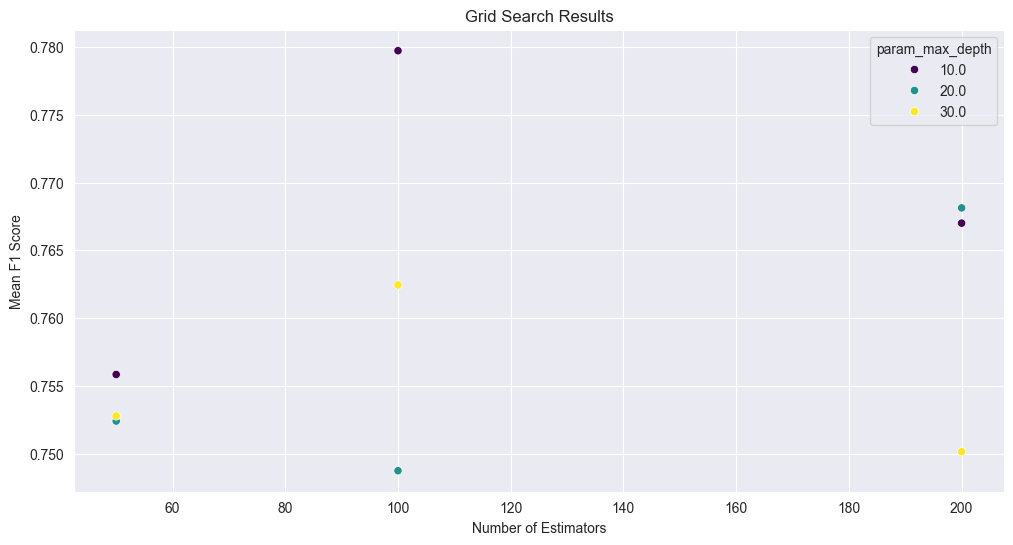

In [17]:
results = pd.DataFrame(grid_search.cv_results_)

print(results[['param_n_estimators', 'param_max_depth', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head())

# Plot the results
plt.figure(figsize=(12, 6))
sns.scatterplot(data=results, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', palette='viridis')
plt.title('Grid Search Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean F1 Score')
plt.show()

## 8. Best model selection
The tuned Random Forest Classifier is better than the default model. The best parameters for the Random Forest Classifier are: F1 - `0.7568411501538197` and for tuned is `0.7797316978541797`.
